In [32]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [33]:
data = yf.download('^GSPC', start='2018-01-01')
#data = yf.download('^GSPC', start='2001-01-03', end='2005-12-31')

[*********************100%%**********************]  1 of 1 completed


In [34]:
df = data['Adj Close'].pct_change() * 100

In [35]:
df = df.rename("Today")

In [36]:
df = df.reset_index()

In [37]:
for i in range(1, 6):
    df['Lag '+str(i)] = df['Today'].shift(i)

In [38]:
df['Volume'] = data.Volume.shift(1).values/1000_000_000
df = df.dropna()

In [39]:
df['Direction'] = [1 if i>0 else 0 for i in df['Today']]

In [40]:
df = sm.add_constant(df)

In [41]:
X = df[['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
y = df.Direction

In [42]:
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.688397
         Iterations 4


In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1513
Model:                          Logit   Df Residuals:                     1506
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Jan 2024   Pseudo R-squ.:                0.002838
Time:                        11:38:40   Log-Likelihood:                -1041.5
converged:                       True   LL-Null:                       -1044.5
Covariance Type:            nonrobust   LLR p-value:                    0.4313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3838      0.220      1.748      0.081      -0.047       0.814
Lag 1         -0.0786      0.041     -1.896      0.058      -0.160       0.003
Lag 2          0.0180      0.041      0.435      0.663      -0.063       0.099
Lag 3         -0.0119      0.042     -0.286      0.775      -0.094       0.070
Lag 4         -0.0354      0.041     -0.858      0.391      -0.116       0.046
Lag 5         -0.0273      0.041     -0.666      0.505      -0.108       0.053
Volume        -0.0542      0.051     -1.070      0.285      -0.154       0.045
==============================================================================
"""

In [44]:
prediction = result.predict(X)

In [45]:
def confusion_matrix(act, pred): #act - actual values, pred - predicted values
    predtrans = ['Up' if i > 0.5 else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals), pd.Series(predtrans), rownames=['Actual'], colnames=['Predicted'])
    return confusion_matrix

In [46]:
a = confusion_matrix(y, prediction)
print(a)

Predicted  Down   Up
Actual              
Down         67  633
Up           51  762


In [47]:
(a.iloc[1, 1] + a.iloc[0, 0])/len(df)

0.5479180436219432

In [48]:
len(df)

1513

In [49]:
(196 + 2914)/len(df)

2.0555188367481825

In [50]:
x_train = df[df.Date.dt.year < 2022][['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
y_train = df[df.Date.dt.year < 2022]['Direction']
x_test = df[df.Date.dt.year == 2022][['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
y_test = df[df.Date.dt.year == 2022]['Direction']


In [51]:
model = sm.Logit(y_train, x_train)

In [52]:
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.679291
         Iterations 5


In [53]:
prediction = result.predict(x_test)

In [54]:
confusion_matrix(y_test, prediction)

Predicted,Down,Up
Actual,,
Down,21,122
Up,14,94


In [55]:
(81+38)/len(x_test)

0.47410358565737054

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix , classification_report


In [57]:
def confusion_matrix(act, pred): #act - actual values, pred - predicted values
    predtrans = ['Up' if i > 0.5 else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals), pd.Series(predtrans), rownames=['Actual'], colnames=['Predicted'])
    return confusion_matrix

In [58]:
import seaborn as sns

[*********************100%%**********************]  1 of 1 completed
Optimization terminated successfully.
         Current function value: 0.687217
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 2202
Model:                          Logit   Df Residuals:                     2195
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Jan 2024   Pseudo R-squ.:                0.008404
Time:                        11:38:41   Log-Likelihood:                -1513.3
converged:                       True   LL-Null:                       -1526.1
Covariance Type:            nonrobust   LLR p-value:                 0.0002586
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0863      0.068     -1

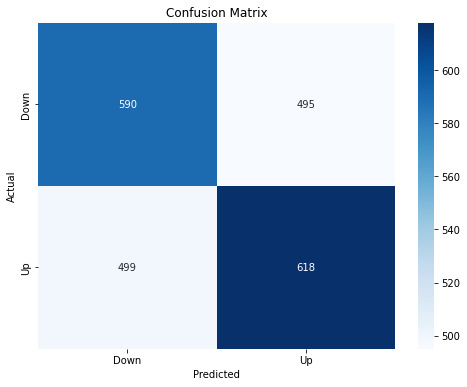

Predicted  Down   Up
Actual              
Down        590  495
Up          499  618
0.5485921889191644
Optimization terminated successfully.
         Current function value: 0.687169
         Iterations 4
Predicted  Down  Up
Actual             
Down        137  44
Up          120  64
0.5506849315068493
Optimization terminated successfully.
         Current function value: 0.688848
         Iterations 4
Predicted  Down   Up
Actual              
Down         68  113
Up           56  128
0.536986301369863


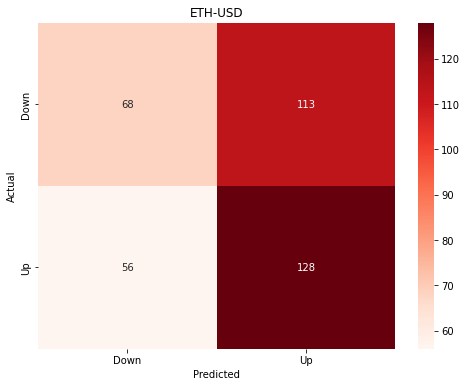

Predicted  Down   Up
Actual              
Down         68  113
Up           56  128
0.5485921889191644


In [59]:
def LR(symbol, start, year,  end=None):
    # Pobranie i przetworzenie danych
    data = yf.download(symbol, start, end)
    df = data['Adj Close'].pct_change() * 100
    df = df.rename('Today')
    df = df.reset_index()
    for i in range(1, 6):
        df['Lag '+str(i)] = df['Today'].shift(i)
    df['Volume'] = data.Volume.shift(1).values/1000_000_000
    df = df.dropna()
    df['Direction'] = [1 if i > 0 else 0 for i in df['Today']]
    df = sm.add_constant(df)

    # Przygotowanie danych do modelu
    X = df[['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y = df.Direction
    model = sm.Logit(y, X)
    result = model.fit()
    print(result.summary())
    prediction = result.predict(X)
    a = confusion_matrix(y, prediction)
    plt.figure(figsize=(8, 6))
    sns.heatmap(a, annot=True, fmt="d", cmap="Blues", cbar=True)
    plt.title("Confusion Matrix")
    plt.show()
    print(a)
    print((a.iloc[1, 1] + a.iloc[0, 0])/len(df))

    # Podział danych na zestawy treningowe i testowe
    x_train = df[df.Date.dt.year < year][['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y_train = df[df.Date.dt.year < year]['Direction']
    x_test = df[df.Date.dt.year == year][['const', 'Lag 1', 'Lag 2', 'Lag 3', 'Lag 4', 'Lag 5', 'Volume']]
    y_test = df[df.Date.dt.year == year]['Direction']

    # Trenowanie modelu LogisticRegression    
    model = sm.Logit(y_train, x_train)
    result = model.fit()
    prediction = result.predict(x_test)
    b = confusion_matrix(y_test, prediction)
    print(b)
    print((b.iloc[1, 1] + b.iloc[0, 0])/len(x_test))

    # Próba ulepszenia wyników poprzez dobranie najbadziej istotnych kolumn 
    x_train = df[df.Date.dt.year < year][['const', 'Lag 1', 'Lag 2']]
    y_train = df[df.Date.dt.year < year]['Direction']
    x_test = df[df.Date.dt.year == year][['const', 'Lag 1', 'Lag 2']]
    y_test = df[df.Date.dt.year == year]['Direction']
    model = sm.Logit(y_train, x_train)
    result = model.fit()
    prediction = result.predict(x_test)

    # Wyświetlanie macierzy pomyłek
    b = confusion_matrix(y_test, prediction)
    print(b)
    print((b.iloc[1, 1] + b.iloc[0, 0])/len(x_test))
    plt.figure(figsize=(8, 6))
    sns.heatmap(b, annot=True, fmt="d", cmap="Reds", cbar=True)
    plt.title("Confusion Matrix")
    plt.title(symbol)
    plt.show()
    print(b)
    print((a.iloc[1, 1] + a.iloc[0, 0])/len(df))
    #print(classification_report(y_test, prediction))


LR('ETH-USD', '2018-01-01', 2023)

[*********************100%%**********************]  1 of 1 completed
Optimization terminated successfully.
         Current function value: 0.689173
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1513
Model:                          Logit   Df Residuals:                     1506
Method:                           MLE   Df Model:                            6
Date:                Wed, 17 Jan 2024   Pseudo R-squ.:                0.002775
Time:                        11:38:51   Log-Likelihood:                -1042.7
converged:                       True   LL-Null:                       -1045.6
Covariance Type:            nonrobust   LLR p-value:                    0.4456
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1333      0.115      1

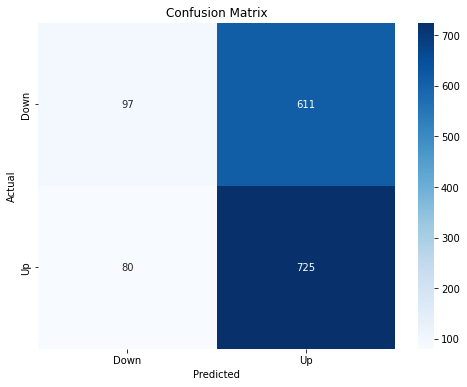

Predicted  Down   Up
Actual              
Down         97  611
Up           80  725
0.543291473892928
Optimization terminated successfully.
         Current function value: 0.688959
         Iterations 4
Predicted  Down   Up
Actual              
Down         14   96
Up           14  126
0.56
Optimization terminated successfully.
         Current function value: 0.689901
         Iterations 4
Predicted  Down   Up
Actual              
Down          8  102
Up            7  133
0.564


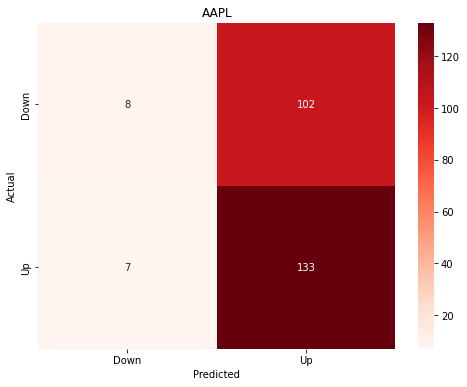

Predicted  Down   Up
Actual              
Down          8  102
Up            7  133
0.543291473892928


In [61]:
LR('AAPL' , '2018-01-01', 2023)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

X = np.random.rand(100, 2)
y = (X[:, 0] + 2 * X[:, 1] + np.random.randn(100) > 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.85
